#Import Necessary Libraries

In [ ]:
import numpy as np                      # numpy used for mathematical operation on array
import pandas as pd                     # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt         # matplotlib used for data visualization
import seaborn as sns                   # seaborn used for data visualization
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

#Reading Dataset

In [ ]:
# Reading Both the datasets with pandas

df1 = pd.read_csv("/content/forest_fires(1).csv")
df2 = pd.read_csv("/content/forest_fires(2).csv")

In [ ]:
# Reading first 5 Rows of the dataset 1

df1.head()

,id,X,Y,month,day,FFMC,DMC
0,1,7,5,mar,fri,86.2,26.2
1,2,7,4,oct,tue,90.6,NaN
2,3,7,4,oct,sat,90.6,43.7
3,4,8,6,mar,fri,91.7,33.3
4,5,8,6,mar,?,89.3,51.3


In [ ]:
# Checking the shape of the dataset 1

df1.shape

(517, 7)

In [ ]:
# Reading first 5 Rows of the dataset 2

df2.head()

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,NaN,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33,NaN,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,5,8,6,mar,?,89.3,51.3,102.2,9.6,NaN,99,NaN,0.0,0.0


In [ ]:
# Checking the shape of the dataset 2

df2.shape

(517, 14)

In [ ]:
# Merging both the dataset 

df = pd.merge(df1, df2, on=['id', 'X', 'Y', 'month', 'day', 'FFMC', 'DMC'])

In [ ]:
# Reading first 5 Rows of the data

df.head()

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,NaN,0.0,0.0
1,2,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33,NaN,0.0,0.0
2,3,7,4,oct,sat,90.6,43.7,686.9,6.7,NaN,33,1.3,0.0,0.0
3,4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,5,8,6,mar,?,89.3,51.3,102.2,9.6,NaN,99,NaN,0.0,0.0


In [ ]:
# Reading last 5 Rows of the data

df.tail()

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,513,4,3,aug,?,81.6,NaN,665.6,1.9,27.8,32,2.7,0.0,6.44
513,514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,515,7,4,aug,?,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,516,1,4,aug,?,94.4,NaN,614.7,11.3,25.6,42,NaN,0.0,0.00
516,517,6,3,nov,?,79.5,NaN,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
# Checking the shape of the data

df.shape

(517, 14)

In [ ]:
# Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      517 non-null    int64  
 1   X       517 non-null    int64  
 2   Y       517 non-null    int64  
 3   month   517 non-null    object 
 4   day     517 non-null    object 
 5   FFMC    517 non-null    float64
 6   DMC     387 non-null    float64
 7   DC      517 non-null    float64
 8   ISI     517 non-null    float64
 9   temp    417 non-null    float64
 10  RH      517 non-null    int64  
 11  wind    308 non-null    float64
 12  rain    517 non-null    float64
 13  area    517 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 60.6+ KB


In [ ]:
# Checking the summary statistics of the dataset

df.describe(include='all')

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517,517,517.000000,387.000000,517.000000,517.000000,417.000000,517.000000,308.000000,517.000000,517.000000
unique,NaN,NaN,NaN,12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,aug,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,184,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,259.000000,4.669246,4.299807,NaN,NaN,90.644681,110.722997,547.940039,9.021663,18.936211,44.288201,3.995130,0.021663,12.847292
std,149.389312,2.313778,1.229900,NaN,NaN,5.520111,64.253808,248.066192,4.559477,5.931578,16.317469,1.707888,0.295959,63.655818
min,1.000000,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,130.000000,3.000000,4.000000,NaN,NaN,90.200000,69.150000,437.700000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,259.000000,4.000000,4.000000,NaN,NaN,91.600000,108.000000,664.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,388.000000,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,23.000000,53.000000,4.900000,0.000000,6.570000


In [ ]:
# Checking the null values of the data

df.isnull()

,id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,True,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [ ]:
# We can see the data types of each column in a tabular format.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
id,int64
X,int64
Y,int64
month,object
day,object
FFMC,float64
DMC,float64
DC,float64
ISI,float64
temp,float64


In [ ]:
# identifying the missing values of each column in a tabular format.

Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
id,int64,0
X,int64,0
Y,int64,0
month,object,0
day,object,0
FFMC,float64,0
DMC,float64,130
DC,float64,0
ISI,float64,0
temp,float64,100


In [ ]:
# identifying the unique values of each column in a tabular format.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,MissingVal,UniqueVal
id,int64,0,517
X,int64,0,9
Y,int64,0,7
month,object,0,12
day,object,0,8
FFMC,float64,0,106
DMC,float64,130,187
DC,float64,0,219
ISI,float64,0,119
temp,float64,100,172


In [ ]:
# identifying count of the variable.

Data_dict['Count'] = df.count()
Data_dict

,0,MissingVal,UniqueVal,Count
id,int64,0,517,517
X,int64,0,9,517
Y,int64,0,7,517
month,object,0,12,517
day,object,0,8,517
FFMC,float64,0,106,517
DMC,float64,130,187,387
DC,float64,0,219,517
ISI,float64,0,119,517
temp,float64,100,172,417


In [ ]:
df['day'].value_counts()

?      200
sun     58
sat     56
fri     54
mon     46
thu     40
wed     32
tue     31
Name: day, dtype: int64

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
# Checking the sum of null values of the data

df.isnull().sum()

id         0
X          0
Y          0
month      0
day      200
FFMC       0
DMC      130
DC         0
ISI        0
temp     100
RH         0
wind     209
rain       0
area       0
dtype: int64

In [ ]:
# Impute numerical null values with median value

df['DMC'].fillna(df['DMC'].median(), inplace=True)
df['temp'].fillna(df['temp'].median(), inplace=True)
df['wind'].fillna(df['wind'].median(), inplace=True)

ca=a=df['day'].mode()[0]
df['day'].fillna(ca,inplace=True)

In [ ]:
# Checking the sum of null values of the updated data

df.isnull().sum()

id       0
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='month'>

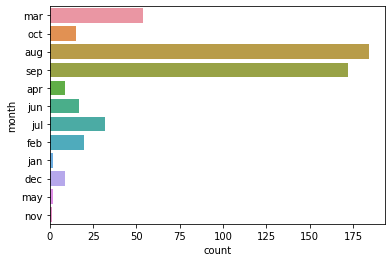

In [ ]:
sns.countplot(y='month', data=df2)

<AxesSubplot:xlabel='count', ylabel='day'>

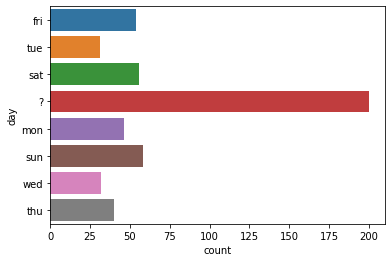

In [ ]:
sns.countplot(y='day', data=df2)

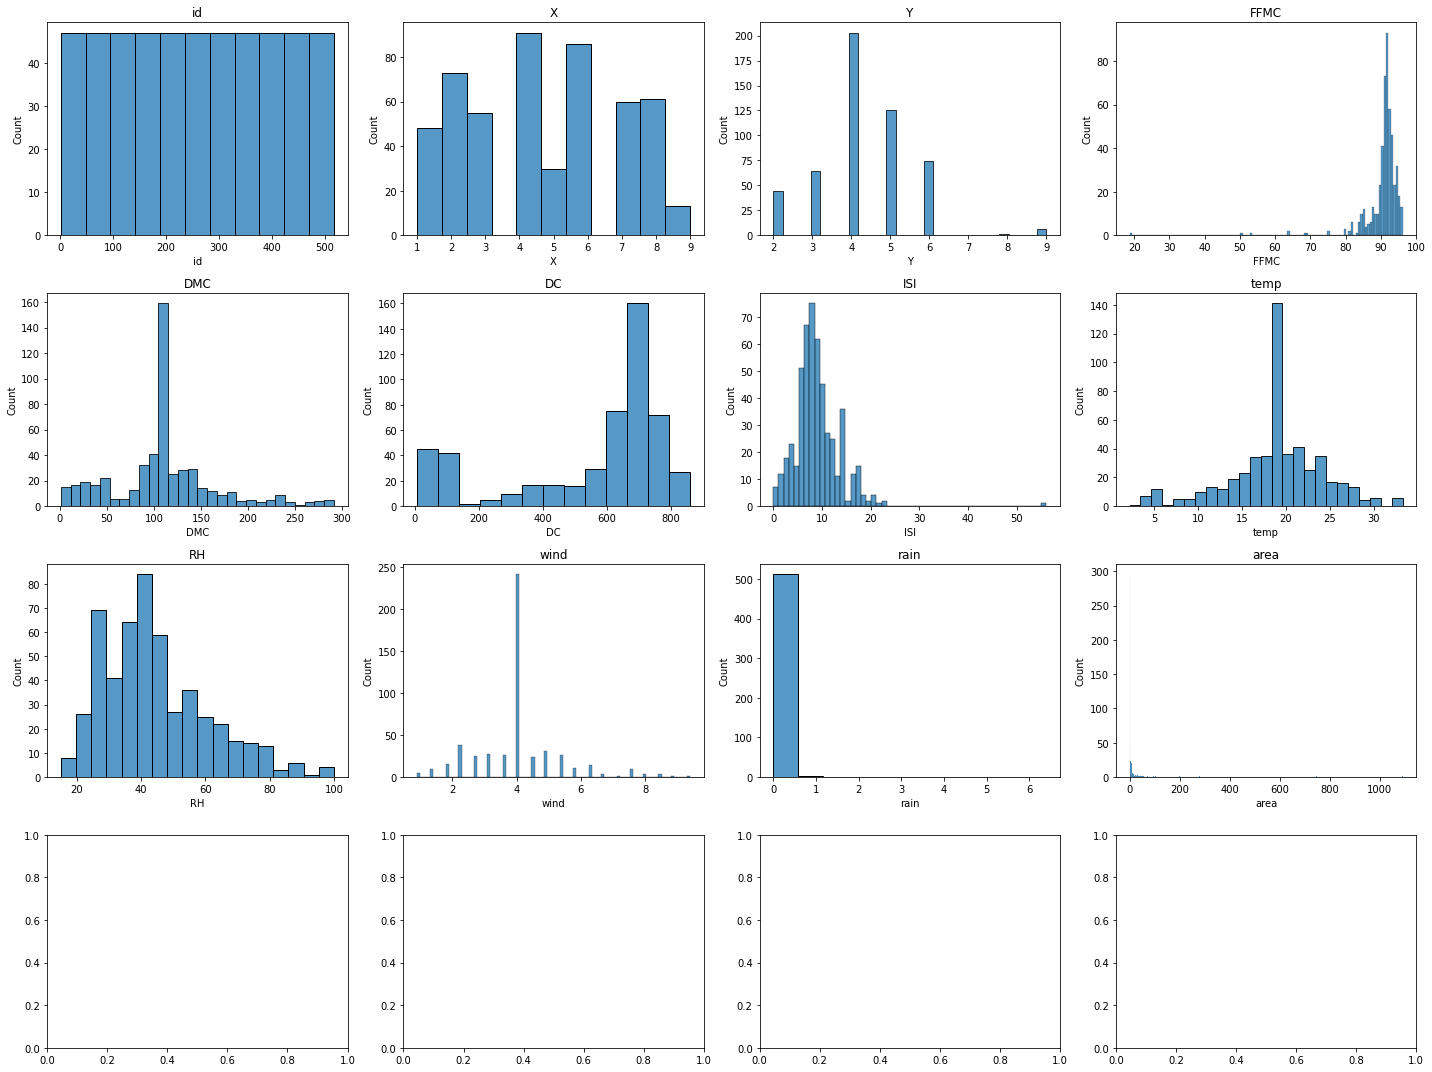

In [ ]:
"""
The code generates a grid of subplots where each subplot shows the distribution,
(i.e., histogram) of a variable/column in the df DataFrame.
This type of plot can be useful for exploring the shape and spread of each variable in a dataset.
"""

# Select only the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots of histograms for each numerical column
n_rows = 4  # Number of rows in the subplot grid
n_cols = 4  # Number of columns in the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i, col in enumerate(num_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r][c]
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<AxesSubplot:>

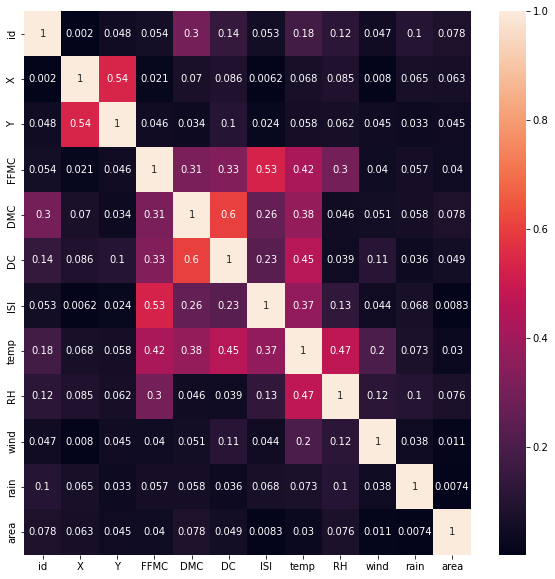

In [ ]:
"""
Heatmap function to visualize the correlation matrix of the columns.
It hows the pairwise correlations (i.e., linear relationships) between all pairs of variables/columns in the DataFrame.
"""

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr().abs(),annot=True)

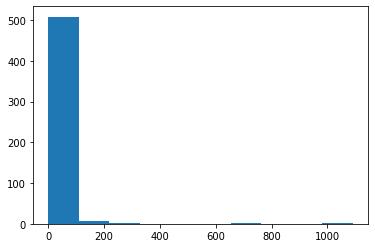

In [ ]:
"""
This graps provide a basic summary and visualization of the distribution of the basesalary column.
The x-axis of the histogram will represent the range of basesalary values, divided into several bins, 
and the y-axis will represent the frequency of observations falling into each bin. 
"""

df.describe()
plt.hist(df['area'])
plt.show()

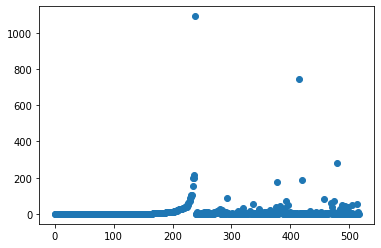

In [ ]:
# Scatterplot, with df.index as the values for the x-axis and df['area'] as the values for the y-axis.

plt.scatter(df.index, df['area'])
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select categorical variables (assuming they are in object data type)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical variables
le = LabelEncoder()
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc)) 

In [ ]:
# Select numerical variables with outliers (assuming they are in float data type)

num_vars = df.select_dtypes(include=['float','int']).columns.tolist()



# Replace outliers with the maximum and minimum values of each variable

for col in num_vars:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else x)

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc)) 

Column id outliers = 0.00%
Column X outliers = 0.00%
Column Y outliers = 9.86%
Column month outliers = 0.00%
Column day outliers = 22.63%
Column FFMC outliers = 10.25%
Column DMC outliers = 14.89%
Column DC outliers = 1.55%
Column ISI outliers = 4.45%
Column temp outliers = 8.12%
Column RH outliers = 2.32%
Column wind outliers = 38.10%
Column rain outliers = 100.00%
Column area outliers = 12.19%


In [ ]:
import pandas as pd
import numpy as np

# Define function to treat outliers in a column
def treat_outliers(col):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 3
    outlier_indices = col[np.abs(col - mean) > std * threshold].index
    col[outlier_indices] = mean

# Treat outliers in each column of the dataset
for col in df.columns:
    treat_outliers(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      517 non-null    int64  
 1   X       517 non-null    float64
 2   Y       517 non-null    float64
 3   month   517 non-null    float64
 4   day     517 non-null    float64
 5   FFMC    517 non-null    float64
 6   DMC     517 non-null    float64
 7   DC      517 non-null    float64
 8   ISI     517 non-null    float64
 9   temp    517 non-null    float64
 10  RH      517 non-null    float64
 11  wind    517 non-null    float64
 12  rain    517 non-null    float64
 13  area    517 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 76.8 KB


In [ ]:
# Split the data into features and target

features = df.drop(['area'], axis=1).values
target = df['area'].values.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33,  random_state = 2)

###Comparing the error with SKLearn Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [ ]:
sk_model.fit(X_train, y_train)

Lasso()

In [ ]:
sk_train_data_prediction = sk_model.predict(X_train)

In [ ]:
test_data_prediction = sk_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# R squared error
score_1_ = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(y_test, test_data_prediction)


print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.06915297419591304
Mean Absolute Error :  4.4835010606006485


#LASSO REGRESSION

In [ ]:
# creating a class for Lasso Regression

class Lasso_Regression():

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    
    def set_params(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) - self.lambda_parameter) / self.m

        db = - 2 * np.sum(self.y - Y_prediction) / self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def score(self, X, y):
        Y_prediction = self.predict(X)
        return 1 - ((y - Y_prediction) ** 2).sum() / ((y - y.mean()) ** 2).sum()


    


  # Predicting the Target variable
    def predict(self,X):
      return np.dot(X, self.w.reshape(-1,1)) + self.b
  
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
        if len(y_true) != len(y_pred):
            raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
        squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
        mse1 = sum(squared_differences) / len(squared_differences)
      
        return mse1
    def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
    
      return r2_score

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Lasso_Regression(learning_rate= 0.1, no_of_iterations= 200, lambda_parameter= 0.01)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
from sklearn import metrics

# R squared error
score_1 = model.r2(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = model.mean_squared_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Squared Error : ', score_2)

R squared error :  [0.05811121]
Mean Squared Error :  [32.48119121]
